## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("keys.env")

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["MSFT","KO"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

KO                                    MSFT  \
                            open    high    low   close    volume   open   
time                                                                       
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244  68.67   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052  69.71   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620  69.38   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866  69.03   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133  68.90   

                                                           
                            high     low  close    volume  
time                                                       
2017-05-01 00:00:00-04:00  69.55  68.500  69.43  27119635  
2017-05-02 00:00:00-04:00  69.71  69.130  69.30  19179268  
2017-05-03 00:00:00-04:00  69.38  68.710  69.08  24576064  
2017-05-04 00:00:00-04:00  69.08  68.640  68.81  18561598  
2017-05-05 00:00:00-04:00  69.03  68.485  68.99  15644971

### The MCForecastTools Library at a Glance

In [7]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [9]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [10]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

KO                                   \
                            open    high    low   close    volume   
time                                                                
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133   

                                         MSFT                                  \
                          daily_return   open   high     low  close    volume   
time                                                                            
2017-05-01 00:00:00-04:00          NaN  68.67  69.55  68.500  69.43  27119635   
2017-05-02 00:00:00-04:00     0.003470  69.71  69.71  69.130  69.30  19179268   
2017-05-03 00:00:00-04:00    -0.001498  69.38  69.38  68.710  69.08  24576064   
2017-05-04 00:00:00-04:00     0.007965  69.03  69.08  68.640  68.81  18561598   
2017-05-05 00:00:00-04:00     0.000458  68.90  69.03  68.485  68.99  15644971   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001872  
2017-05-03 00:00:00-04:00    -0.003175  
2017-05-04 00:00:00-04:00    -0.003909  
2017-05-05 00:00:00-04:00     0.002616

In [8]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011183,1.003640,0.995387,1.003003,1.002283,0.991261,0.993851,1.004959,0.995040,1.005974,...,0.987744,0.999161,1.001092,1.015067,0.991717,0.993505,1.005455,0.992440,1.014116,0.996327
2,1.010516,1.013914,0.986976,0.994755,0.988325,0.997444,0.982326,1.005981,1.001946,1.013416,...,0.988858,1.002668,1.005572,1.002438,1.004596,0.979046,1.003859,1.007666,1.025195,0.991248
3,1.020538,1.014956,0.995326,0.971891,1.002391,1.008548,0.998577,1.009823,1.023618,1.006224,...,1.007736,1.009974,1.001745,1.003470,1.013095,0.996308,1.013724,1.001729,1.010593,0.994025
4,1.008357,1.015980,0.990913,0.967137,0.995449,1.011326,1.007435,1.013989,1.032095,0.995030,...,0.998612,1.015970,0.978090,1.026153,1.020178,1.001752,1.022909,0.996071,1.014151,0.999556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.320943,3.625409,3.503447,1.085580,1.246446,1.439788,1.434845,2.251037,2.848876,1.858250,...,3.062218,2.144138,1.879846,2.887162,1.406283,4.133657,1.443959,1.986593,1.575785,4.102522
1257,2.298058,3.670266,3.450661,1.093163,1.257378,1.437472,1.410902,2.249188,2.823875,1.860901,...,3.094995,2.138825,1.869621,2.874659,1.434135,4.148609,1.428483,1.990941,1.552572,4.075057
1258,2.333132,3.619737,3.421655,1.104514,1.269939,1.423639,1.428474,2.263686,2.866994,1.865590,...,3.090344,2.174377,1.872586,2.897630,1.441873,4.162761,1.412225,1.969911,1.548777,4.108532
1259,2.314822,3.675878,3.392552,1.120610,1.267853,1.433143,1.444003,2.287083,2.925508,1.881977,...,3.114467,2.166647,1.836733,2.940865,1.454774,4.256929,1.408203,1.939488,1.550266,4.120576


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/anthonysegovia/Desktop/Miami_Bootcamp_Personal/01-Lesson-Plans/05-APIs/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

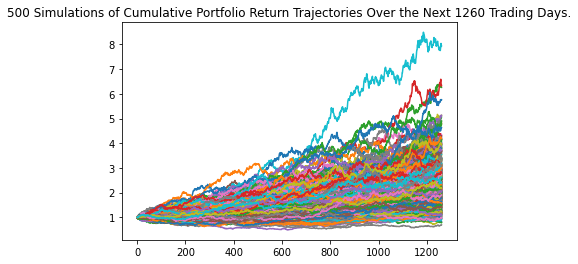

In [11]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

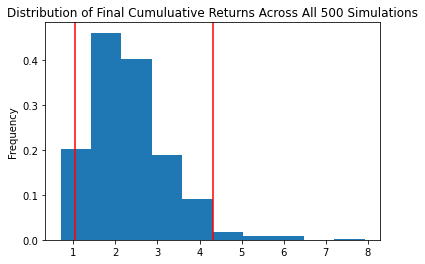

In [12]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.323990
std               0.925465
min               0.693030
25%               1.683704
50%               2.185599
75%               2.803284
max               7.933877
95% CI Lower      1.031816
95% CI Upper      4.319117
Name: 1260, dtype: float64


In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $10318.16 and $43191.17
